In [2]:
import scipy
from scipy import stats, optimize, interpolate
import os
import pandas
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import random
from math import sqrt
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from pylab import *

In [3]:
d=pandas.read_csv('Seasons_Stats.csv', header=0,na_values=['0'])
data=d
d=d.drop(['Unnamed: 0', 'blanl', 'blank2',], axis=1)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#print(d.isnull().sum())
d = d.fillna(d.mean())
#print(d.isnull().sum())
d = d.dropna()
print(d.isnull().sum())
print(d.shape)
#d


Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64
(24624, 50)


In [6]:
#d=pandas.read_csv('Seasons_Stats.csv', header=0,na_values=['0'])
#data=d
#d=d.drop(['Unnamed: 0', 'blanl', 'blank2',], axis=1)
#d=d.dropna()
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

x = d.select_dtypes(include=numerics)
#x1 = x[['Age']]
#z4 =  (x1-x1.mean())/x1.std()
#z=(x-x.min())/(x.max()-x.min())
z=(x-x.mean())/x.std()

#z1=z[['Age', 'AST']]
#z2=z[['Year']]
#print(z2.std())
#z2 = z2.iloc[:50,:]
#z2.sort_values(by=['Year'])
z
#qqplot(z, line='s')
#plt.show()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,-2.443831,1.128689,0.459043,-1.523988e-13,-2.440541e-16,-5.967114e-16,-1.554668,-3.616976e-14,0.622056,3.104780e-14,...,-0.155793,1.006392e-14,-6.418412e-15,-2.268950e-15,0.426829,5.151980e-15,-1.571247e-14,-4.823987e-14,1.184108,-0.118685
1,-2.443831,0.608027,-0.069335,-1.523988e-13,-2.440541e-16,-5.967114e-16,-0.747661,-3.616976e-14,0.242080,3.104780e-14,...,-0.131890,1.006392e-14,-6.418412e-15,-2.268950e-15,-0.072337,5.151980e-15,-1.571247e-14,-4.823987e-14,-0.223696,-0.484140
2,-2.443831,-0.433296,0.610009,-1.523988e-13,-2.440541e-16,-5.967114e-16,-1.241501,-3.616976e-14,-0.365883,3.104780e-14,...,-0.211568,1.006392e-14,-6.418412e-15,-2.268950e-15,0.158621,5.151980e-15,-1.571247e-14,-4.823987e-14,0.885844,-0.159518
3,-2.443831,-0.693627,-1.352540,-1.523988e-13,-2.440541e-16,-5.967114e-16,-2.229181,-3.616976e-14,0.280077,3.104780e-14,...,-1.319092,1.006392e-14,-6.418412e-15,-2.268950e-15,-0.735408,5.151980e-15,-1.571247e-14,-4.823987e-14,-1.058834,-0.925136
4,-2.443831,-0.693627,-1.428022,-1.523988e-13,-2.440541e-16,-5.967114e-16,-2.277360,-3.616976e-14,0.199332,3.104780e-14,...,-1.406737,1.006392e-14,-6.418412e-15,-2.268950e-15,-0.735408,5.151980e-15,-1.571247e-14,-4.823987e-14,-1.082695,-0.933303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,1.400205,-0.693627,0.421302,1.190167e+00,5.528122e-01,7.055471e-01,1.287923,-1.275369e+00,0.503313,4.982763e-01,...,-0.362956,1.154811e+00,9.040462e-01,7.884838e-01,-0.146839,5.748170e-01,9.242400e-01,-1.835498e-01,0.850052,0.250853
24687,1.400205,0.087366,0.006148,-1.324780e+00,-7.352213e-01,8.409763e-02,0.131615,-1.248774e+00,-0.422879,6.371771e-01,...,-1.279253,-3.603769e-01,-5.186690e-01,-4.577757e-01,-0.571503,-1.020352e+00,-1.965732e-01,-9.397679e-01,-0.677057,-0.690347
24688,1.400205,-1.734950,-1.201574,-1.523988e-13,-1.182813e+00,-8.732705e-01,-1.819655,-3.616976e-14,-0.831354,1.007579e+00,...,-0.992412,-8.873988e-01,-9.477418e-01,-8.524984e-01,-0.854612,-1.165367e+00,-6.812492e-01,-1.225450e+00,-1.202001,-1.006802
24689,1.400205,-1.214288,-0.258042,-7.079066e-01,-3.938924e-01,-9.404542e-01,0.071390,1.689969e+00,-0.736359,-1.052783e+00,...,0.401952,-8.215211e-01,-3.003687e-01,-4.533406e-01,-0.616205,-7.883274e-01,-3.480344e-01,-6.036710e-01,-0.474238,-0.563765


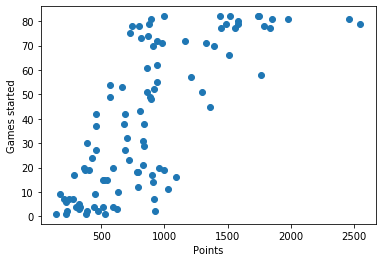

In [33]:
y1=list(d.PTS)
y2 = list(d.GS)
plt.scatter(y1[:100], y2[:100])
plt.xlabel('Points')

plt.ylabel('Games started')
plt.show()

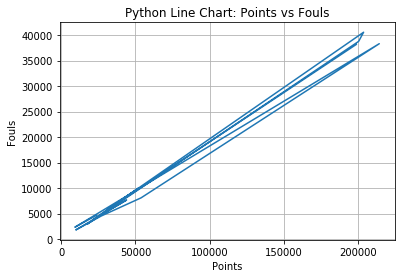

In [34]:
points = []
teams = ['BOS','BRK','CHA','CHO','DEN','IND','KCK','NOH','NOK','NOP','OKC','PHO','SDC','VAN']
fouls = [38161.0,5614.0,9943.0,2937.0,38757.0,40553.0,3718.0,7651.0,1785.0,4529.0,8073.0,38307.0,2318.0,4663.0]

for i in teams:
    a = 0
    for j in d.iterrows():
        if(j[1][4] == i):
           a = a+j[1][49]
    points.append(a) 
plot(points,fouls)

xlabel('Points')
ylabel('Fouls')
title('Python Line Chart: Points vs Fouls')
grid(True)
show()   

In [53]:
from scipy.stats import norm
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False     
ages = []    
for i in d.iterrows():
    if(i[1][4] == 'BOS'):
        ages.append(i[1][3])

mu = st.mean(ages)
std = st.stdev(ages)
sample_size = 10
sample = []
#null hypothesis mean = 26.98 
for i in range(10):
    sample.append(np.random.choice(ages))
alpha = 0.05
print('H0 : μ =', mu)
print('H1 : μ !=', mu)
print('alpha value is :', alpha, '\n')
print("The sample is ",sample)
smu = st.mean(sample)  
print("Sample mean is =",smu)   
reject = two_sided_hypo(smu,mu,std, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 26.984126984126984
H1 : μ != 26.984126984126984
alpha value is : 0.05 

The sample is  [35.0, 26.0, 36.0, 22.0, 25.0, 32.0, 30.0, 24.0, 29.0, 32.0]
Sample mean is = 29.1
actual z value : 1.9599639845400545
hypothesis z value : 1.6786198060878919 

Failed to reject NULL hypothesis


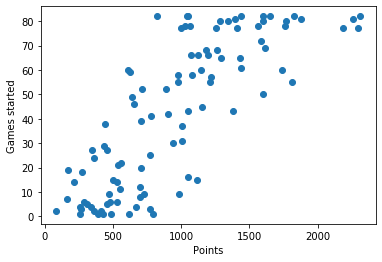

0.7776361870941095


In [4]:
y1=list(d.PTS)
y2=list(d.GS)
plt.scatter(y1[400:500], y2[400:500])
plt.xlabel('Points')

plt.ylabel('Games started')
plt.show()
for i in range(400,500):
    y2[i] = (y2[i] - st.mean(y2))/st.stdev(y2)

for i in range(400,500):
    y1[i] = (y1[i] - st.mean(y1))/st.stdev(y1)


#scipy.stats.pearsonr(y1,y2)    
a = scipy.stats.pearsonr(y1,y2)
print(a[0])

In [6]:
from scipy.stats import norm
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
      
blocks = []    
for i in d.iterrows():
    if(i[1][3] == 20):
        blocks.append(i[1][46])

mu = st.mean(blocks)
std = st.stdev(blocks)
sample_size = 10
sample = []
#null hypothesis mean = 26.98 
for i in range(10):
    sample.append(np.random.choice(blocks))
alpha = 0.05
print('H0 : μ <', mu)
print('H1 : μ >=', mu)
print('alpha value is :', alpha, '\n')
print("The sample is ",sample)
smu = st.mean(sample)  
print("Sample mean is =",smu)   
reject = one_sided_hypo(smu,mu,std, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ < 34.385185185185186
H1 : μ >= 34.385185185185186
alpha value is : 0.05 

The sample is  [39.0, 50.0, 151.0, 111.0, 17.0, 3.0, 113.0, 14.0, 17.0, 27.0]
Sample mean is = 54.2
actual z value : 1.6448536269514729
hypothesis z value : 1.4963031904225725 

Failed to reject NULL hypothesis
